/Users/asrith/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[*********************100%***********************]  99 of 99 completed
/var/folders/jh/5qgf89253j945pw6bjvtshgr0000gn/T/ipykernel_16791/840823427.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').last()


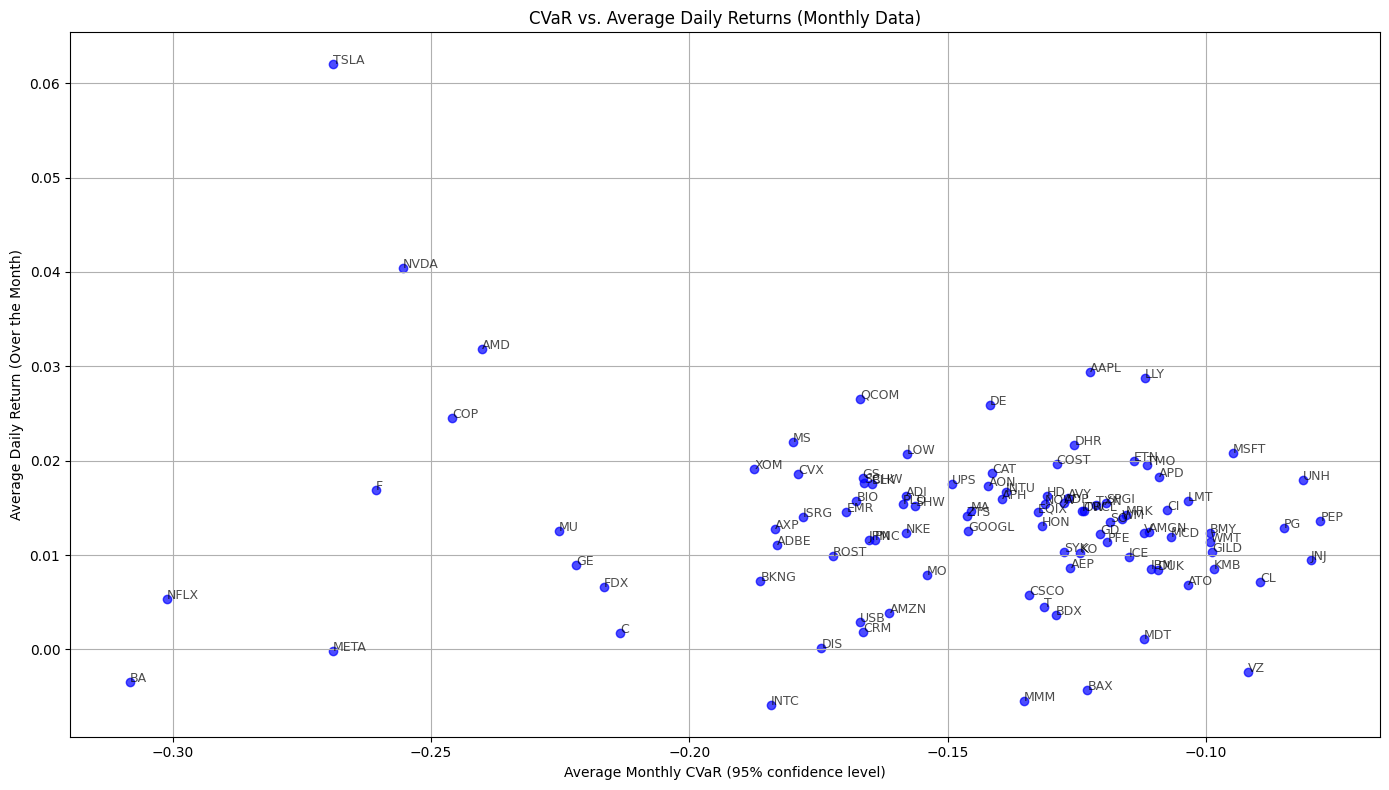

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
random.seed(42)

# List of some random stocks (both S&P 500 and others)
random_stocks = [
    'AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN', 'NVDA', 'META', 'JNJ', 'JPM', 'V', 'PG', 'UNH', 'HD', 'MA', 
            'DIS', 'NFLX', 'ADBE', 'KO', 'PEP', 'XOM', 'VZ', 'INTC', 'MRK', 'T', 'CSCO', 'PFE', 'CRM', 'BMY', 'QCOM', 
           'WMT', 'NKE', 'ORCL', 'LLY', 'COST', 'MCD', 'AMGN', 'DHR', 'UPS', 'TXN', 'MDT', 'GS', 'HON', 'IBM', 
           'MS', 'BLK', 'LOW', 'BA', 'CVX', 'SPGI', 'CAT', 'GE', 'NOW', 'MMM', 'ISRG', 'INTU', 'SYK', 'PLD', 
           'SCHW', 'BKNG', 'ZTS', 'TMO', 'CI', 'LMT', 'C', 'AXP', 'MU', 'AMD', 'DE', 'MO', 'FDX', 'GILD', 'DUK', 
           'AEP', 'CL', 'KMB', 'SO', 'ADP', 'PNC', 'USB', 'COP', 'BDX', 'ADI', 'WM', 'ETN', 'ICE', 'F', 'EMR', 
           'ROST', 'AON', 'ITW', 'GD', 'SHW', 'EQIX', 'APD', 'APH', 'ATO', 'AVY', 'BAX', 'BIO'
]  # A random selection of stocks, including non-S&P 500 stocks

# Download historical data (from 2019 to 2023)
data = yf.download(random_stocks, start="2019-01-01", end="2023-01-01")['Adj Close']

# Resample data by month, calculating monthly returns
monthly_data = data.resample('M').last()
monthly_returns = monthly_data.pct_change().dropna()

# Function to calculate CVaR for monthly returns
def calculate_monthly_cvar(returns, confidence_level=0.95):
    var = np.percentile(returns, (1 - confidence_level) * 100)
    cvar = returns[returns < var].mean()
    return cvar

# Store the results of CVaR and average daily returns
results = []
for stock in random_stocks:
    stock_returns = monthly_returns[stock]
    monthly_cvar = calculate_monthly_cvar(stock_returns, confidence_level=0.95)
    avg_daily_return = stock_returns.mean()  # Average monthly return (daily returns over the month)
    results.append((stock, monthly_cvar, avg_daily_return))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Stock", "CVaR", "Avg_Daily_Return"])
results_df = results_df.sort_values(by="CVaR", ascending=False)  # Sort by CVaR for better visualization

# Plot the CVaR vs. Average Daily Return
plt.figure(figsize=(14, 8))
plt.scatter(results_df["CVaR"], results_df["Avg_Daily_Return"], color="blue", alpha=0.7)

# Label each point with the stock symbol
for i, row in results_df.iterrows():
    plt.text(row["CVaR"], row["Avg_Daily_Return"], row["Stock"], fontsize=9, alpha=0.7)

plt.title("CVaR vs. Average Daily Returns (Monthly Data)")
plt.xlabel("Average Monthly CVaR (95% confidence level)")
plt.ylabel("Average Daily Return (Over the Month)")
plt.grid(True)
plt.tight_layout()
plt.show()